# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("datasets/spotify_music.csv")

In [3]:
# data.iloc[1500]
data.describe()

,Rank,Streams,Explicit,Track_number_on_album,Artist_followers,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Mode,Key,Valence
count,4247.000000,4.247000e+03,4247.000000,4247.000000,4.247000e+03,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000
mean,87.220391,9.991090e+06,0.446668,4.466211,1.494934e+07,0.225022,0.688924,0.635774,0.009960,0.177312,-6.308090,0.129370,122.247086,0.571698,5.247940,0.488441
std,58.883576,7.635629e+06,0.497206,4.926232,1.618903e+07,0.236764,0.139260,0.162323,0.064362,0.134594,2.507428,0.117828,29.926934,0.494891,3.658011,0.222670
min,1.000000,2.525159e+06,0.000000,1.000000,9.000000e+00,0.000025,0.150000,0.027900,0.000000,0.019700,-34.475000,0.023200,46.718000,0.000000,0.000000,0.032000
25%,34.000000,5.181312e+06,0.000000,1.000000,3.280170e+06,0.042600,0.606000,0.537000,0.000000,0.096950,-7.428000,0.046000,97.958000,0.000000,1.000000,0.317000
50%,80.000000,7.199130e+06,0.000000,2.000000,7.878088e+06,0.137000,0.705000,0.649000,0.000000,0.124000,-5.943000,0.078700,120.013000,1.000000,5.000000,0.483000
75%,137.500000,1.205281e+07,1.000000,7.000000,2.157105e+07,0.328000,0.789000,0.756000,0.000024,0.212000,-4.681000,0.178000,142.984000,1.000000,8.000000,0.660000
max,200.000000,7.146787e+07,1.000000,76.000000,7.896787e+07,0.994000,0.980000,0.978000,0.953000,0.962000,1.509000,0.966000,212.117000,1.000000,11.000000,0.982000


In [4]:
features = ['Explicit','Artist_followers','Track_number_on_album','Acousticness','Danceability','Energy','Liveness','Loudness','Speechiness','Tempo','Mode','Key','Valence']
label = ['Rank']

<AxesSubplot:>

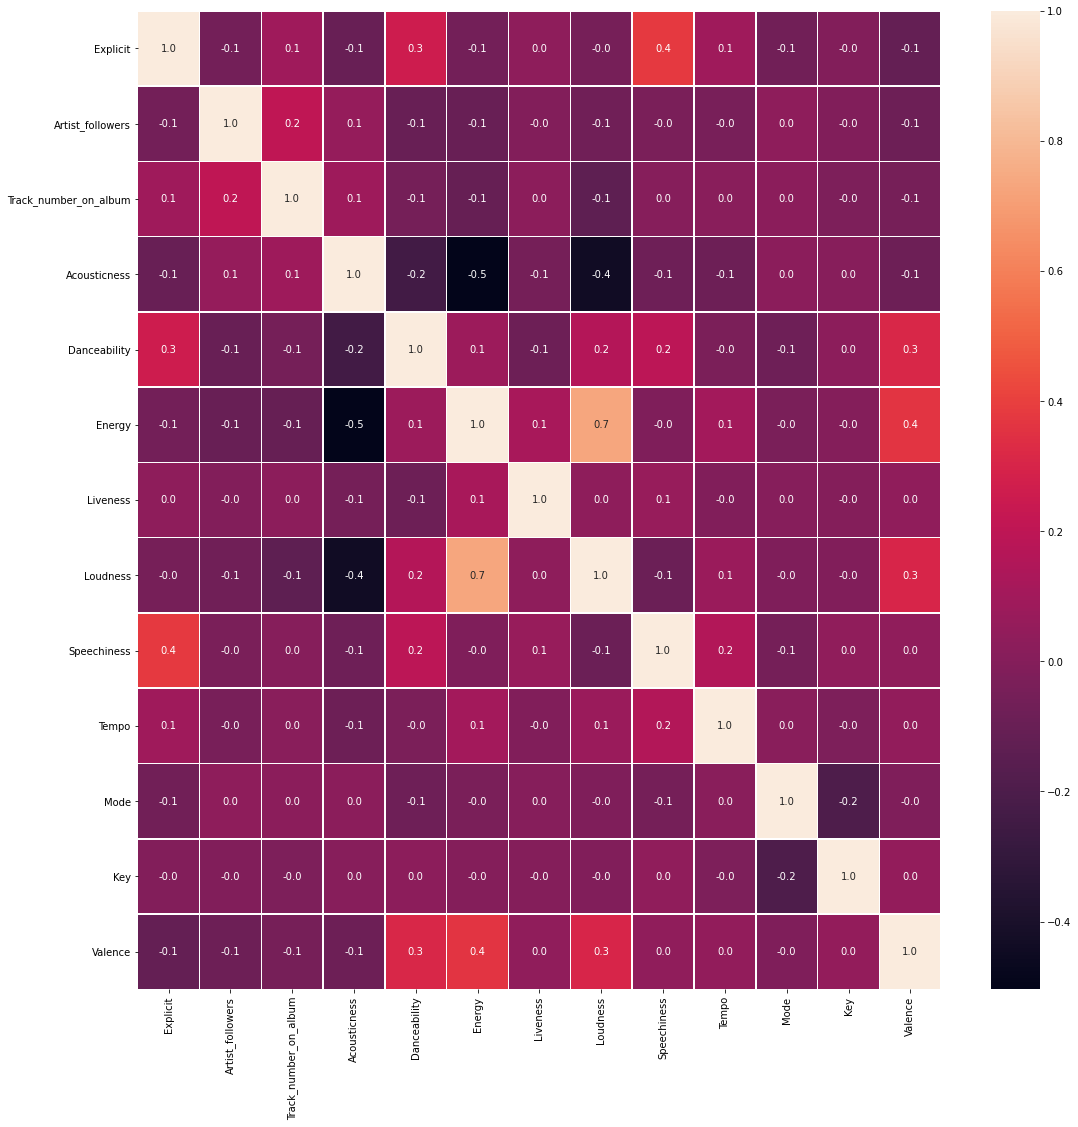

In [5]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data[features].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Mean value for Explicit : 0.44666823640216624


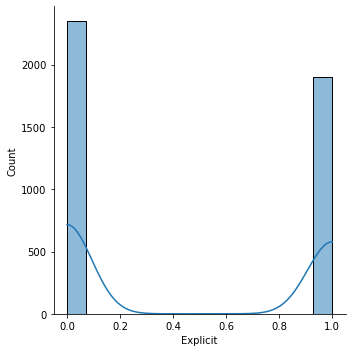

Mean value for Artist_followers : 14949337.932187427


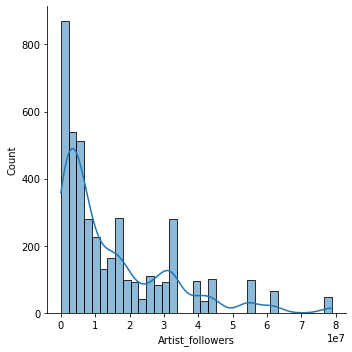

Mean value for Track_number_on_album : 4.466211443371792


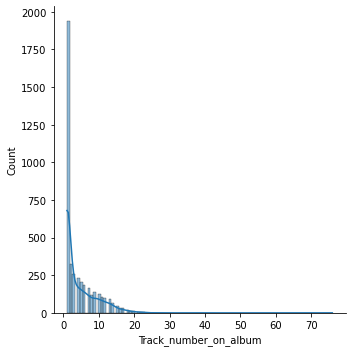

Mean value for Acousticness : 0.22502158994584404


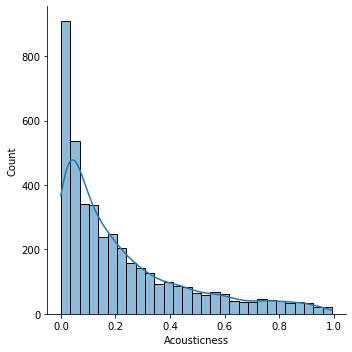

Mean value for Danceability : 0.6889239463150473


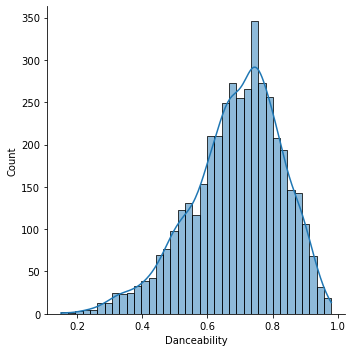

Mean value for Energy : 0.6357740287261588


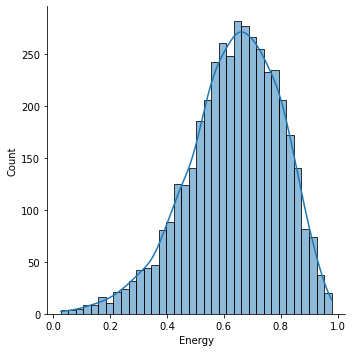

Mean value for Liveness : 0.17731191429244195


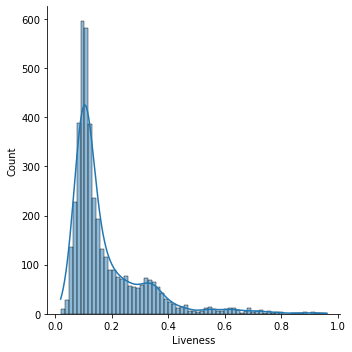

Mean value for Loudness : -6.308090181304427


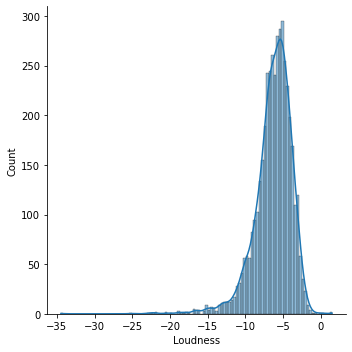

Mean value for Speechiness : 0.12937014363079835


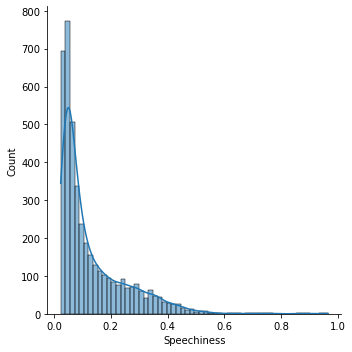

Mean value for Tempo : 122.2470857075584


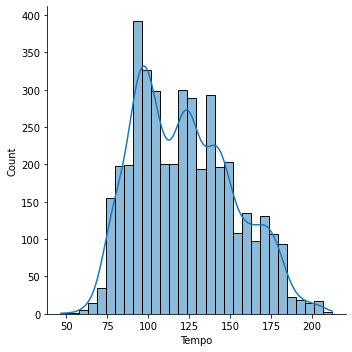

Mean value for Mode : 0.5716976689427832


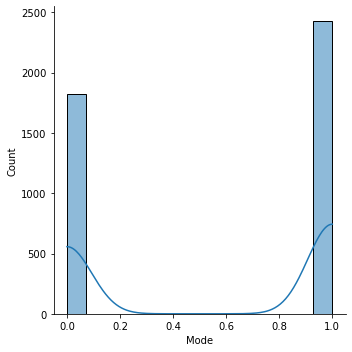

Mean value for Key : 5.247939722156817


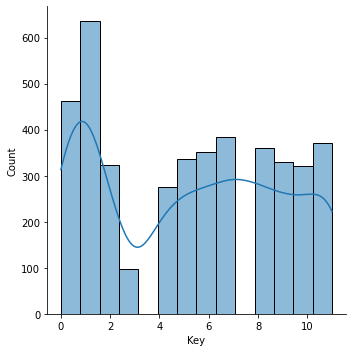

Mean value for Valence : 0.48844056981398654


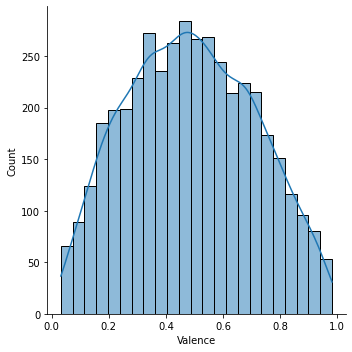

In [6]:
for f in features:
    print(f"Mean value for {f.capitalize()} :", data[f].mean())
    sns.displot(data[f], kde=True)
    plt.savefig(f'plots/{f}.png')
    plt.show()

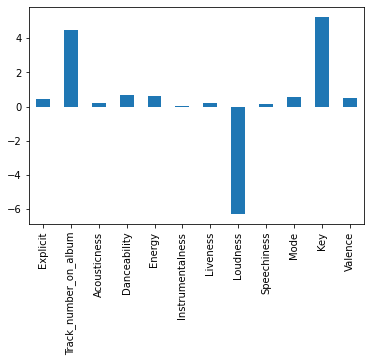

In [21]:
data.drop(['Streams', 'Artist_followers', 'Tempo', 'Rank'], axis=1).mean().plot.bar()
plt.show()

In [22]:
# data.columns = [i.capitalize() for i in data.columns]

In [23]:
# data.to_csv('datasets/spotify_music.csv', index=False)

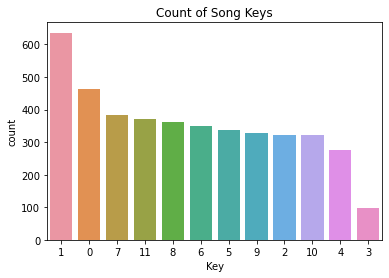

In [7]:
#map the numeric values of key to notes
key_mapping = {0.0: 'C', 1.0: 'C♯,D♭', 2.0: 'D', 3.0: 'D♯,E♭', 4.0: 'E', 5.0: 'F', 6.0: 'F♯,G♭', 7.0: 'G', 8.0: 'G♯,A♭', 9.0: 'A', 10.0: 'A♯,B♭', 11.0: 'B'}
keys = np.array(data['Key'])
# data.head()
sns.countplot(x = 'Key', data=data, order=data['Key'].value_counts().index)
plt.title("Count of Song Keys")
plt.savefig("./plots/key.png")
plt.show()

In [29]:
# I NEED MORE FEATURES

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

pca = PCA(n_components=3) # We take 3 principal components
pca_result = pca.fit_transform(data[features].values)
data['pca-one'] = pca_result[:,0]
data['pca-two'] = pca_result[:,1] 
data['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [1.00000000e+00 3.41141914e-12 8.93899597e-14]


Clearly the first principal component gives a lot of information.

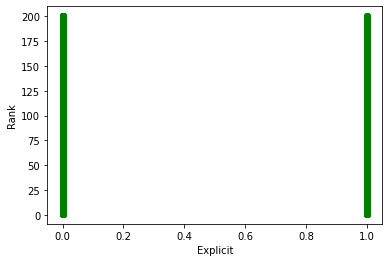

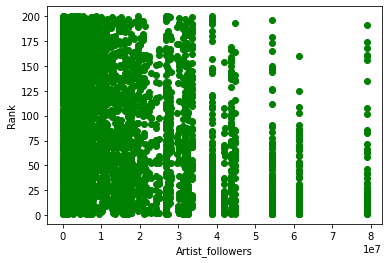

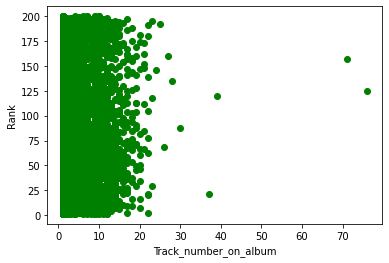

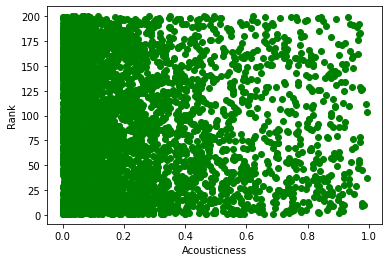

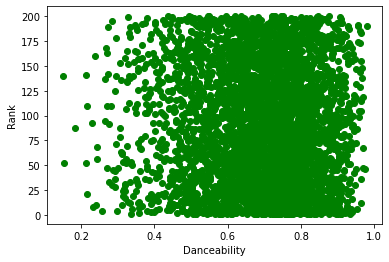

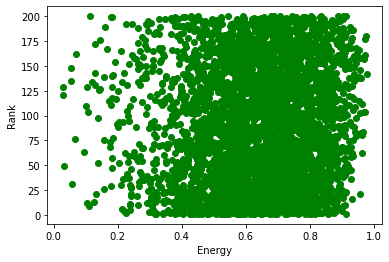

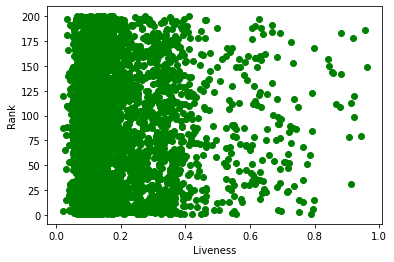

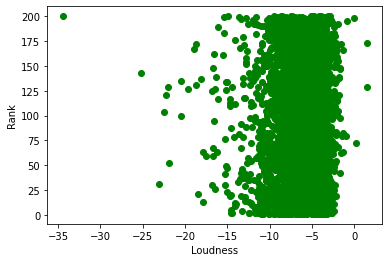

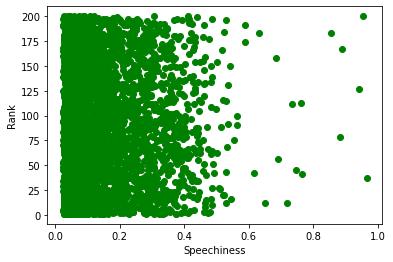

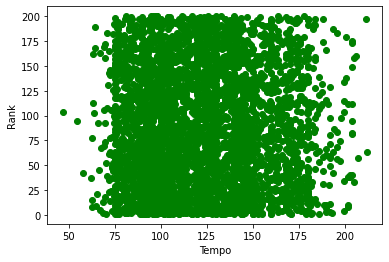

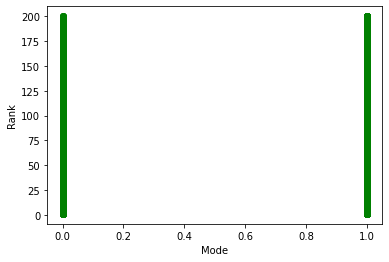

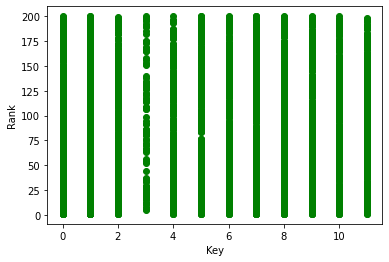

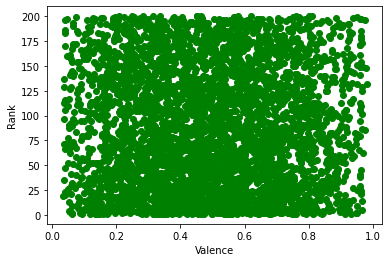

In [36]:
for f in features:
    plt.figure()
    plt.plot(data[f],data['Rank'],'go')
    plt.xlabel(f"{f}")
    plt.ylabel("Rank")
    plt.savefig(f'plots/RankVs{f}.png')
    plt.show()